<a href="https://colab.research.google.com/github/SaravanavelE/TechnoHacks/blob/main/HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORT THE NECCESSORY LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

***IMPORT THE DATASET***

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/techh/house/kc_house_data.csv")
d.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***SPLIT THE DATASET INTO X & Y***

In [ ]:
x=pd.DataFrame(d,columns=['bedrooms','bathrooms','floors','yr_built'])
y=pd.DataFrame(d,columns=['price'])
print(x.head())
print(y.head())

   bedrooms  bathrooms  floors  yr_built
0         3       1.00     1.0      1955
1         3       2.25     2.0      1951
2         2       1.00     1.0      1933
3         4       3.00     1.0      1965
4         3       2.00     1.0      1987
      price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0


***SPLIT THE DATASET INTO TRAINING AND TESTING DATASET***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17290, 4), (4323, 4), (17290, 1), (4323, 1))

***LINEAR REGRESSION MODEL***

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

***MEAN SQUARED ERROR***

In [ ]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 93336585901.1865


***R- SQUARED ERROR***

In [ ]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.35545991918923425


***PLOT THE GRAPH BETWEEN PREDICTED VALUE AND ACTUAL VALUE***

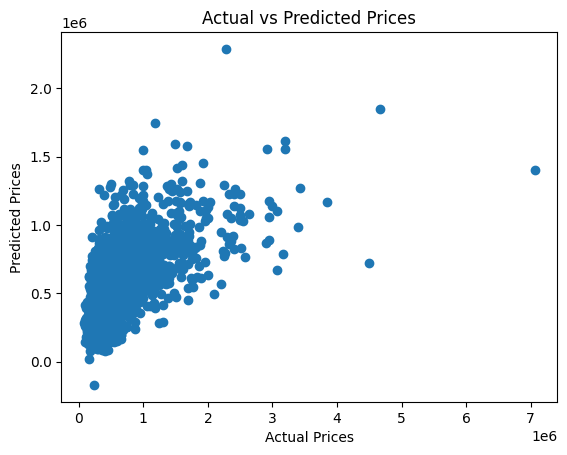

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

***PLOT HISTOGRAMS FOR EACH FEATURE***

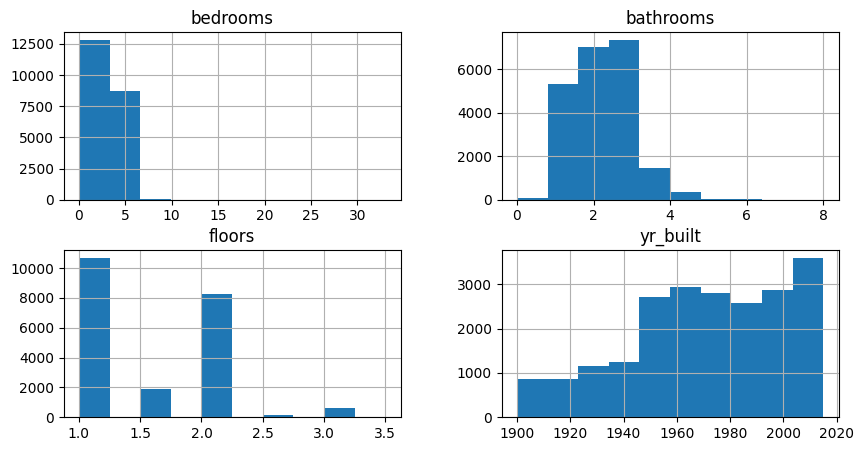

In [ ]:
x.hist(figsize=(10, 5))
plt.show()

***CORRELATION MATRIX***

In [ ]:
corr_matrix = x.corr()
print("correlation Matrix:\n\n",corr_matrix)

correlation Matrix:

            bedrooms  bathrooms    floors  yr_built
bedrooms   1.000000   0.515884  0.175429  0.154178
bathrooms  0.515884   1.000000  0.500653  0.506019
floors     0.175429   0.500653  1.000000  0.489319
yr_built   0.154178   0.506019  0.489319  1.000000


***HEAT MAP***

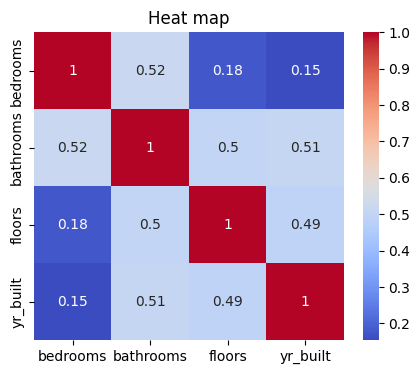

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat map')
plt.show()